┌ Info: Saved animation to 
│   fn = /Users/ben/src/github.com/BenLirio/stevens/sandbox/simulation/ray-trace/tmp.gif
└ @ Plots /Users/ben/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/ben/src/github.com/BenLirio/stevens/sandbox/simulation/ray-trace/tmp.gif")
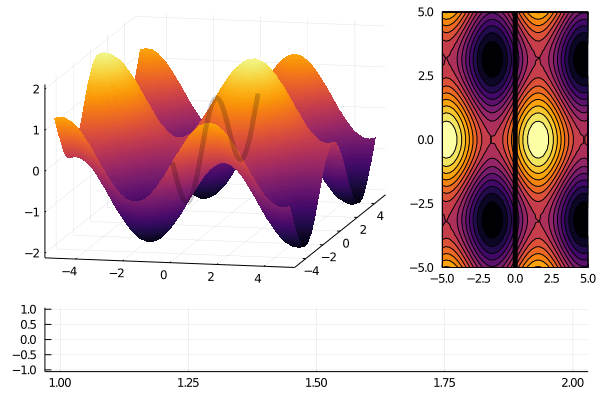

In [1]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

In [4]:
@layout [a{0.7w} b; c{0.2h}]

Plots.GridLayout(2, 1)